<a href="https://colab.research.google.com/github/Keeming99/Predicting-Models-on-Hotel-Bookings-and-Cancellation/blob/main/Predicting_Models_on_Hotel_Bookings_and_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Models on Hotel Bookings and Cancellation**



# Project background

The hospitality industry, specifically the hotel sector, faces considerable challenges in managing bookings and cancellations efficiently. Understanding the factors influencing booking behaviors and cancellation is important for optimizing revenue and enhancing customers satisfaction.

The project aims to leverage data-driven insights to identify patterns and relationships within hotel booking and cancellation.

# Cross-Industry Standard Process (CRISP-DM)

CRISP-DM is a methodology used for guiding the data mining or analytics process. CRISP-DM provides a structured approach to analyzing the dataset, ensuring that each phase—from understanding the data to building predictive models and presenting insights—is systematically executed. This methodology allows for a comprehensive understanding of hotel booking and cancellation behaviors and facilitates the extraction of actionable insights for the hospitality industry.​

There are 6 phases of CRISP-DM, including business understanding, data understanding, data preparation, modelling, evaluation and deployment.

# Phase 1: Business understanding

**Overview**:

Hotel industry faces challenges such last-minute cancellation and full seasonal booking. Moreover, hostel industry also faces lower booking rate due to service quality, facilities available and operation system. There is important to analyze hotels' historical booking and cancellation data by understanding the trends and factors that influenced. Therefore, hostel industry can implement strategies to improve hotels booking rate and reduce cancellation.

**Business Objective**: ​

- Increase hotels performance by reducing cancellations and maximizing booking rates.

- Improve customer experience by better understanding their preferences, leading to tailored services and reducing dissatisfaction caused by cancellations.

**Data Mining Goals**:

- To forecast the likelihood of a booking being make and booking being canceled based on booking lead time, booking policies and customer behaviour.

# Phase 2: Data Understanding

**Data Source :** Hotel Booking from Kaggle

**Data URL:** https://www.kaggle.com/datasets/mojtaba142/hotel-booking/data

The dataset presents booking demand data for City Hotel and Resort Hotel from 1st July 2015 to 31st August 2017. It comprises 119390 rows and 36 columns.

# Phase 3: Data Preparation

# Import Libraries

In [ ]:
# numeric calculation
import numpy as np
import statistics as st

# dataframe
import pandas as pd
from collections import Counter

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data splitting
from sklearn.model_selection import train_test_split, cross_val_score

# preprocessing
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import Pipeline

#modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Data Cleaning

- Check and identify missing values in some variables, such as company, agent, country and children
- Substitute the missing values
- Drop the columns with missing values

In [ ]:
#Read the hotel booking dataset
df = pd.read_csv('/content/hotel_booking.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.shape

##There are 119390 rows and 36 columns

(119390, 36)

In [ ]:
# Checking for missing values and missing percentage of each column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = ((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

In [ ]:
mv = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Values Percentage': missing_percentage
})
mv

,Missing Values,Missing Values Percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
hotel,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
days_in_waiting_list,0,0.000000
customer_type,0,0.000000
adr,0,0.000000


In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df.dropna(axis=0, inplace=True, subset=['children'])

In [ ]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
df.dropna(axis=0, inplace=True, subset=['country'])

In [ ]:
df['agent'].replace(np.nan, 'No agent', inplace=True)

In [ ]:
df['company'].replace(np.nan, 'No company', inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
email                             0
phone-number                      0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                      

In [ ]:
df.shape

(118898, 36)

In [ ]:
# Checking for duplicate records
duplicate_records = df.duplicated()

# Counting the total number of duplicate records
total_duplicates = duplicate_records.sum()
print("Total number of duplicate records:", total_duplicates)

#Hence there are no duplicated rows that are needed to be removed

Total number of duplicate records: 0


# Data Selection

Before we start with the Exploratory Data Analysis (EDA), it would be worthwhile to differentiate which columns are categorical and which are numerical.

Because this would be useful for determining the type of visualisation that can later be performed.

We can see that there are 36 columns that contain 18 categorical features and 18 numerical features as follows.

In [ ]:
#Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


## Correlation Study

To shorten the EDA process, we will not do EDA for the entire column but only for the columns that do have a high influence on the target variable, namely is_cancelled. Seeing the result of the statistical correlation test below, we conclude that the numerical features with the highest correlation are lead_time (29%), total_of_special_requests (24%), required_car_parking_spaces (19%). Therefore, we will analyse these 3 numerical features only, and we will do analysis for all categories afterwards.

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.291994,0.016412,0.007465,-0.006127,-0.002631,0.024110,0.058381,0.004751,-0.032521,-0.085179,0.109922,-0.055493,-0.144659,0.054016,0.046199,-0.194796,-0.235643
lead_time,0.291994,1.000000,0.039924,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,-0.125091,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536
arrival_date_year,0.016412,0.039924,1.000000,-0.540493,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,0.010128,-0.119922,0.029800,0.031124,-0.056823,0.197857,-0.012661,0.108927
arrival_date_week_number,0.007465,0.126738,-0.540493,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,-0.030411,0.035367,-0.020768,0.005187,0.022993,0.075277,0.001717,0.025778
arrival_date_day_of_month,-0.006127,0.002320,-0.000590,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.006340,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082
stays_in_weekend_nights,-0.002631,0.083984,0.021669,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.087836,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669
stays_in_week_nights,0.024110,0.164783,0.031754,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.097994,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785
adults,0.058381,0.116799,0.029146,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.147494,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815
children,0.004751,-0.038335,0.054492,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.032990,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786
babies,-0.032521,-0.021149,-0.013183,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.008954,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601


<ipython-input-19-29e3c3317c4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='flare')


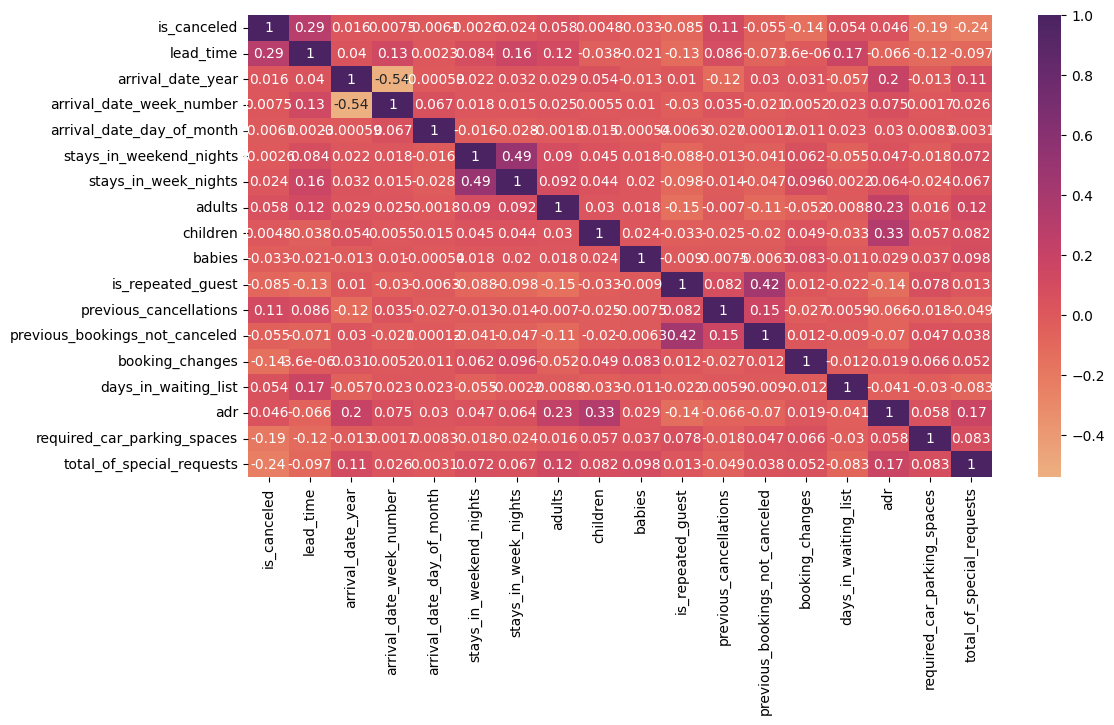

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='flare')
plt.show()

In [ ]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)

<ipython-input-20-b9a2a54165f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['is_canceled'].abs().sort_values(ascending=False)


is_canceled                       1.000000
lead_time                         0.291994
total_of_special_requests         0.235643
required_car_parking_spaces       0.194796
booking_changes                   0.144659
previous_cancellations            0.109922
is_repeated_guest                 0.085179
adults                            0.058381
previous_bookings_not_canceled    0.055493
days_in_waiting_list              0.054016
adr                               0.046199
babies                            0.032521
stays_in_week_nights              0.024110
arrival_date_year                 0.016412
arrival_date_week_number          0.007465
arrival_date_day_of_month         0.006127
children                          0.004751
stays_in_weekend_nights           0.002631
Name: is_canceled, dtype: float64

## Dropping unnecessary columns

In [ ]:
cols_to_drop = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'adults', 'children', 'babies',
                'market_segment', 'distribution_channel', 'agent', 'company', 'days_in_waiting_list',
                'customer_type', 'adr', 'reservation_status', 'reservation_status_date', 'name',
                'email', 'phone-number', 'credit_card', 'assigned_room_type']
df_clean = df.drop(columns= cols_to_drop)
df_clean

,hotel,is_canceled,lead_time,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,BB,PRT,0,0,0,C,3,No Deposit,0,0
1,Resort Hotel,0,737,BB,PRT,0,0,0,C,4,No Deposit,0,0
2,Resort Hotel,0,7,BB,GBR,0,0,0,A,0,No Deposit,0,0
3,Resort Hotel,0,13,BB,GBR,0,0,0,A,0,No Deposit,0,0
4,Resort Hotel,0,14,BB,GBR,0,0,0,A,0,No Deposit,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,BB,BEL,0,0,0,A,0,No Deposit,0,0
119386,City Hotel,0,102,BB,FRA,0,0,0,E,0,No Deposit,0,2
119387,City Hotel,0,34,BB,DEU,0,0,0,D,0,No Deposit,0,4
119388,City Hotel,0,109,BB,GBR,0,0,0,A,0,No Deposit,0,0


# Exploratory Data Analysis (EDA)

## The distribution plot of the rate actually paid

As you can see, the average daily rate histogram is right skewed.
Hence, the majority of the average daily rates clustered towards the lower end.

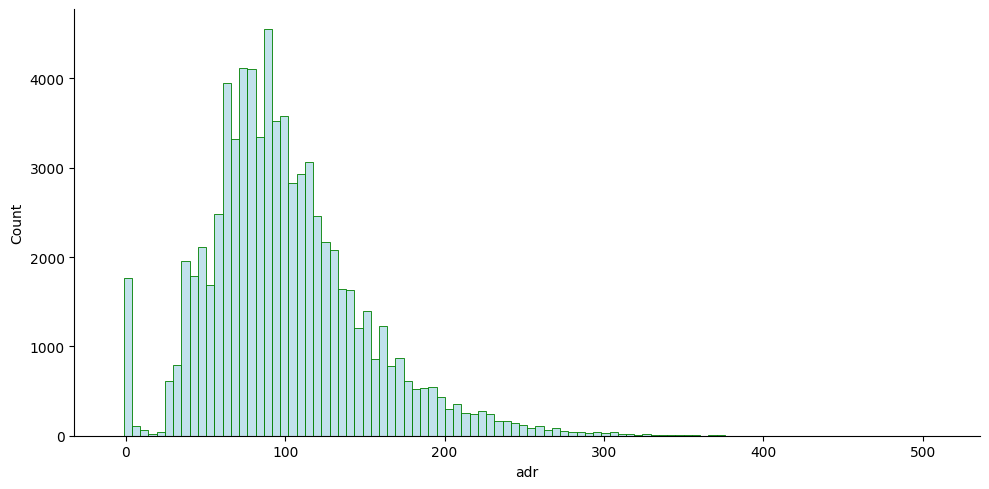

In [ ]:
sns.displot(data = df[df['is_canceled'] == 0], x = 'adr', height = 5, aspect= 2, bins = 100, color = 'lightblue', edgecolor = 'g')

## KDE Plot

This visualization helps in understanding the distribution and overlap of average daily rates between the two groups which are 'Not Canceled' and 'Canceled'.

Text(0.5, 1.0, 'Rates paid for canceled and not canceled reservations')

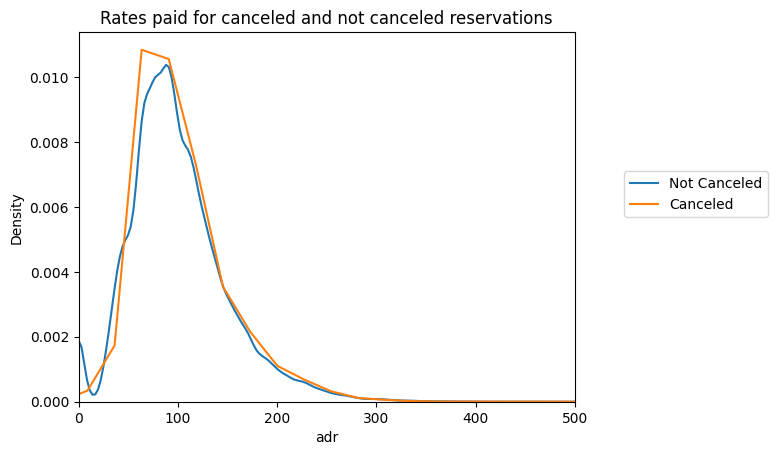

In [ ]:
plt.xlim(0, 500)
sns.kdeplot(data = df[df['is_canceled'] == 0], x = 'adr', label = 'Not Canceled')
sns.kdeplot(data = df[df['is_canceled'] == 1], x = 'adr', label = 'Canceled')
plt.legend(loc=(1.1,0.5))
plt.title('Rates paid for canceled and not canceled reservations')

## Bar Plot

This chart displays the count of total special requests for each type of hotel, which showcasing the distribution or frequency of special requests in each category of hotel

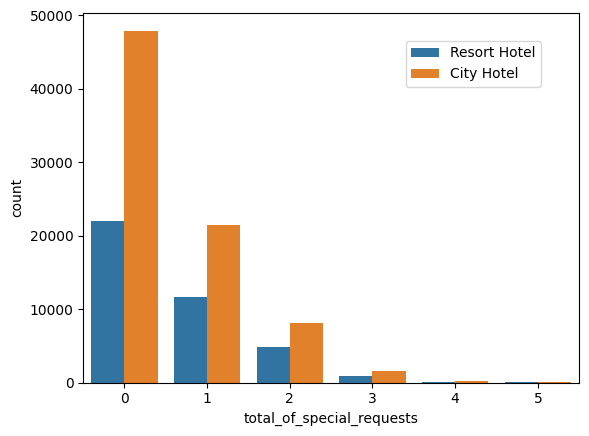

In [ ]:
sns.countplot(data = df_clean, x = 'total_of_special_requests', hue = 'hotel')
plt.legend(loc=(.65,.8))

## Cancellation percentage

According to the graph below, 62.86% of reservations were confirmed and 37.14% of the bookings were cancelled or guests didn't show up at the hotel.

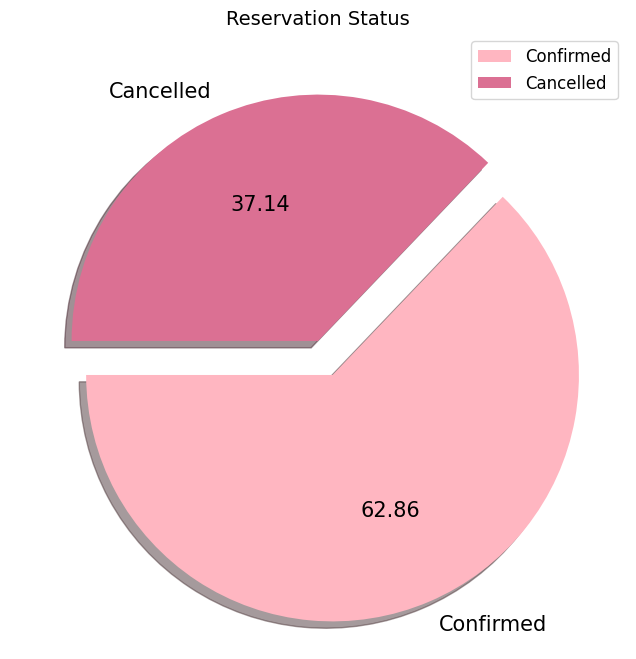

In [ ]:
plt.figure(figsize=(14, 8))

plt.pie(df_clean['is_canceled'].value_counts(),
        autopct='%.2f',
        explode=[0.15, 0],
        labels=['Confirmed', 'Cancelled'],
        shadow=True,
        textprops={'fontsize': 15},
        colors=['#FFB6C1', '#DB7093'],  # Pink and Palevioletred
        startangle=180
        )

plt.title('Reservation Status', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.show()

# Objectives

-To forecast the likelihood of a booking being make and booking being canceled based on booking lead time, booking policies and customer behaviour.

(booking policies = No refund, No deposit, Refundable)
(customer behaviour = Previous cancellation vs Previous booking not canceled)

## Categorical Features Analysis

As mentioned above, we have 18 categorical features. Now let's check the general distribution of the meaningful columns based on its 'is_canceled' value.

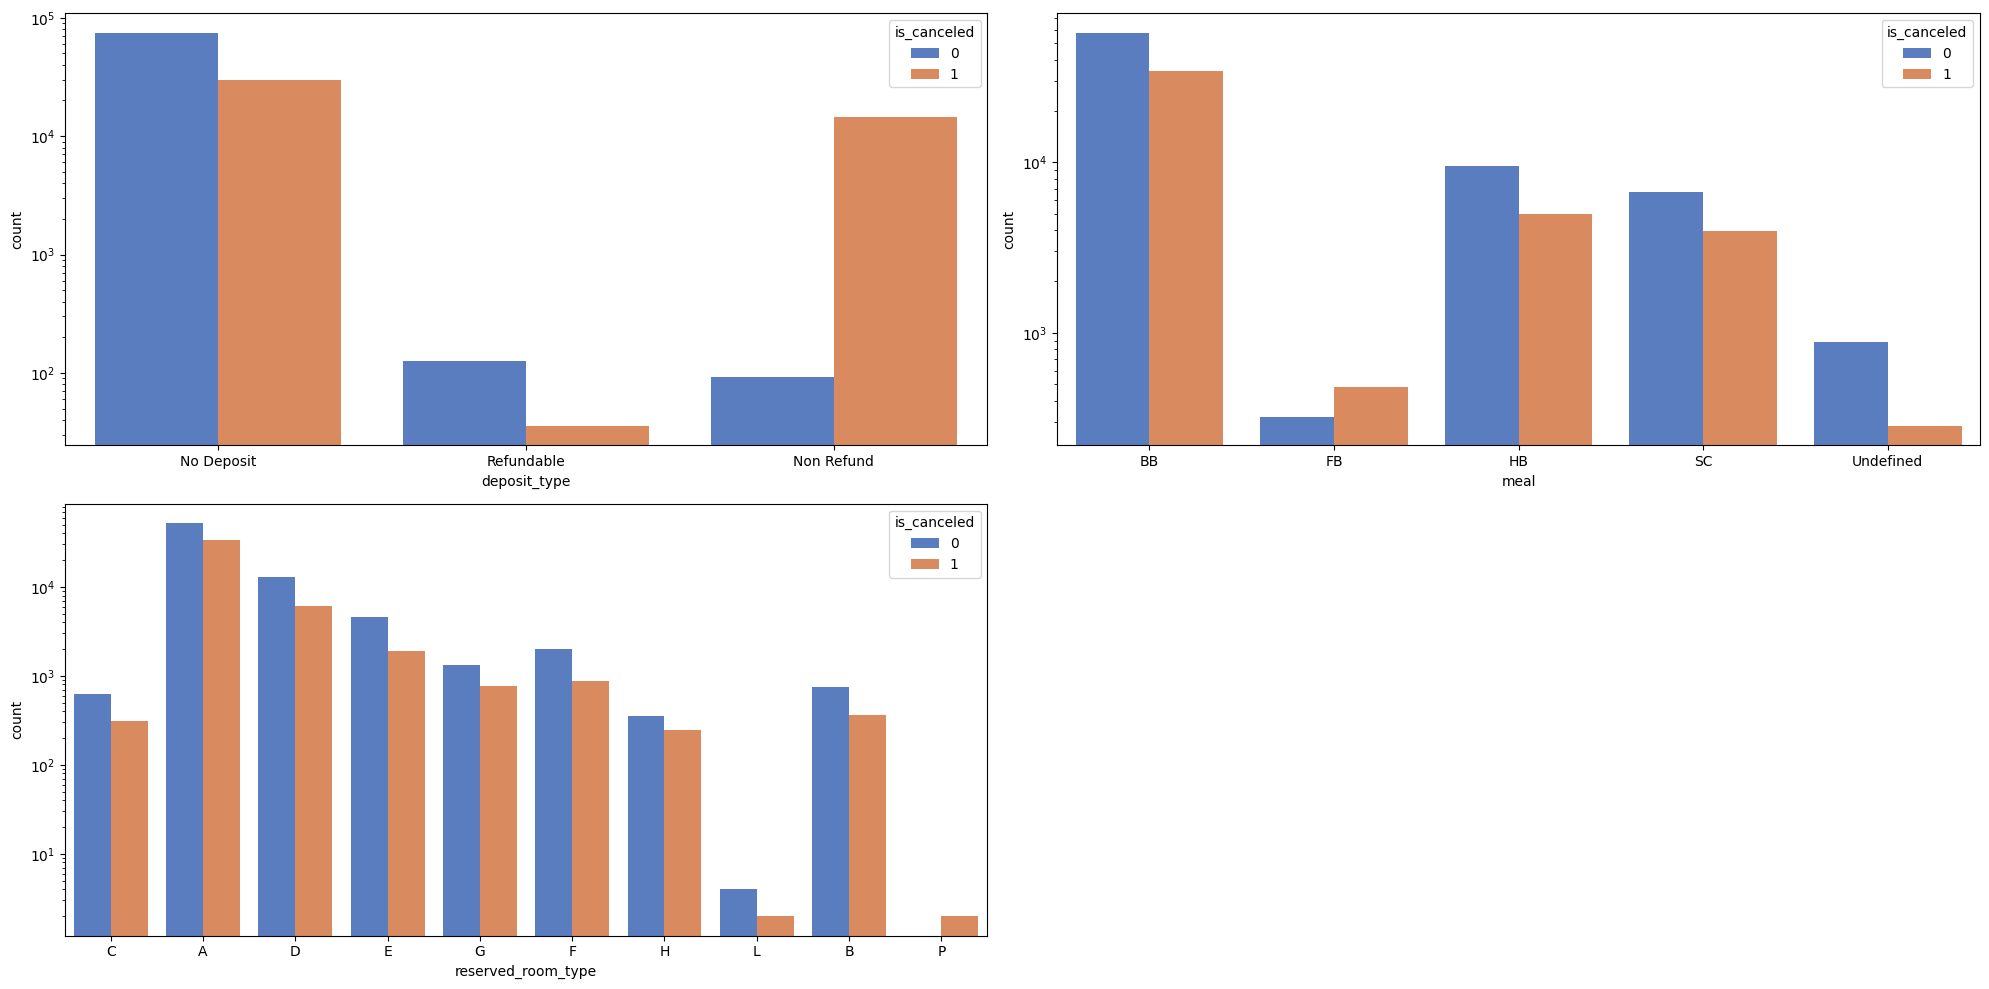

In [ ]:
# Categorical EDA

# Select all features that have object types
categorical_var = df.dtypes[df.dtypes == object][1:].index.tolist()

# Specify certain columns to visualize
selected_columns = ['deposit_type', 'meal', 'reserved_room_type']

# Create empty plots to accommodate the selected columns in a Y x 2 layout
num_cols = 2  # Number of columns
num_rows = (len(selected_columns) + 1) // num_cols  # Calculate the number of rows needed
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Iterate through selected variables and visualize them using countplot
for ix, ctg in enumerate(selected_columns):
    row = ix // num_cols
    col = ix % num_cols
    g = sns.countplot(x=ctg, hue='is_canceled', data=df, palette='muted', log=True, ax=ax[row, col])

# Hide empty subplots if any
for ix in range(len(selected_columns), num_rows * num_cols):
    row = ix // num_cols
    col = ix % num_cols
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()


## Numerical Features Analysis

Now, let's take a look at the distribution analysis of numerical features in accordance with the value of the 'is_canceled' value.


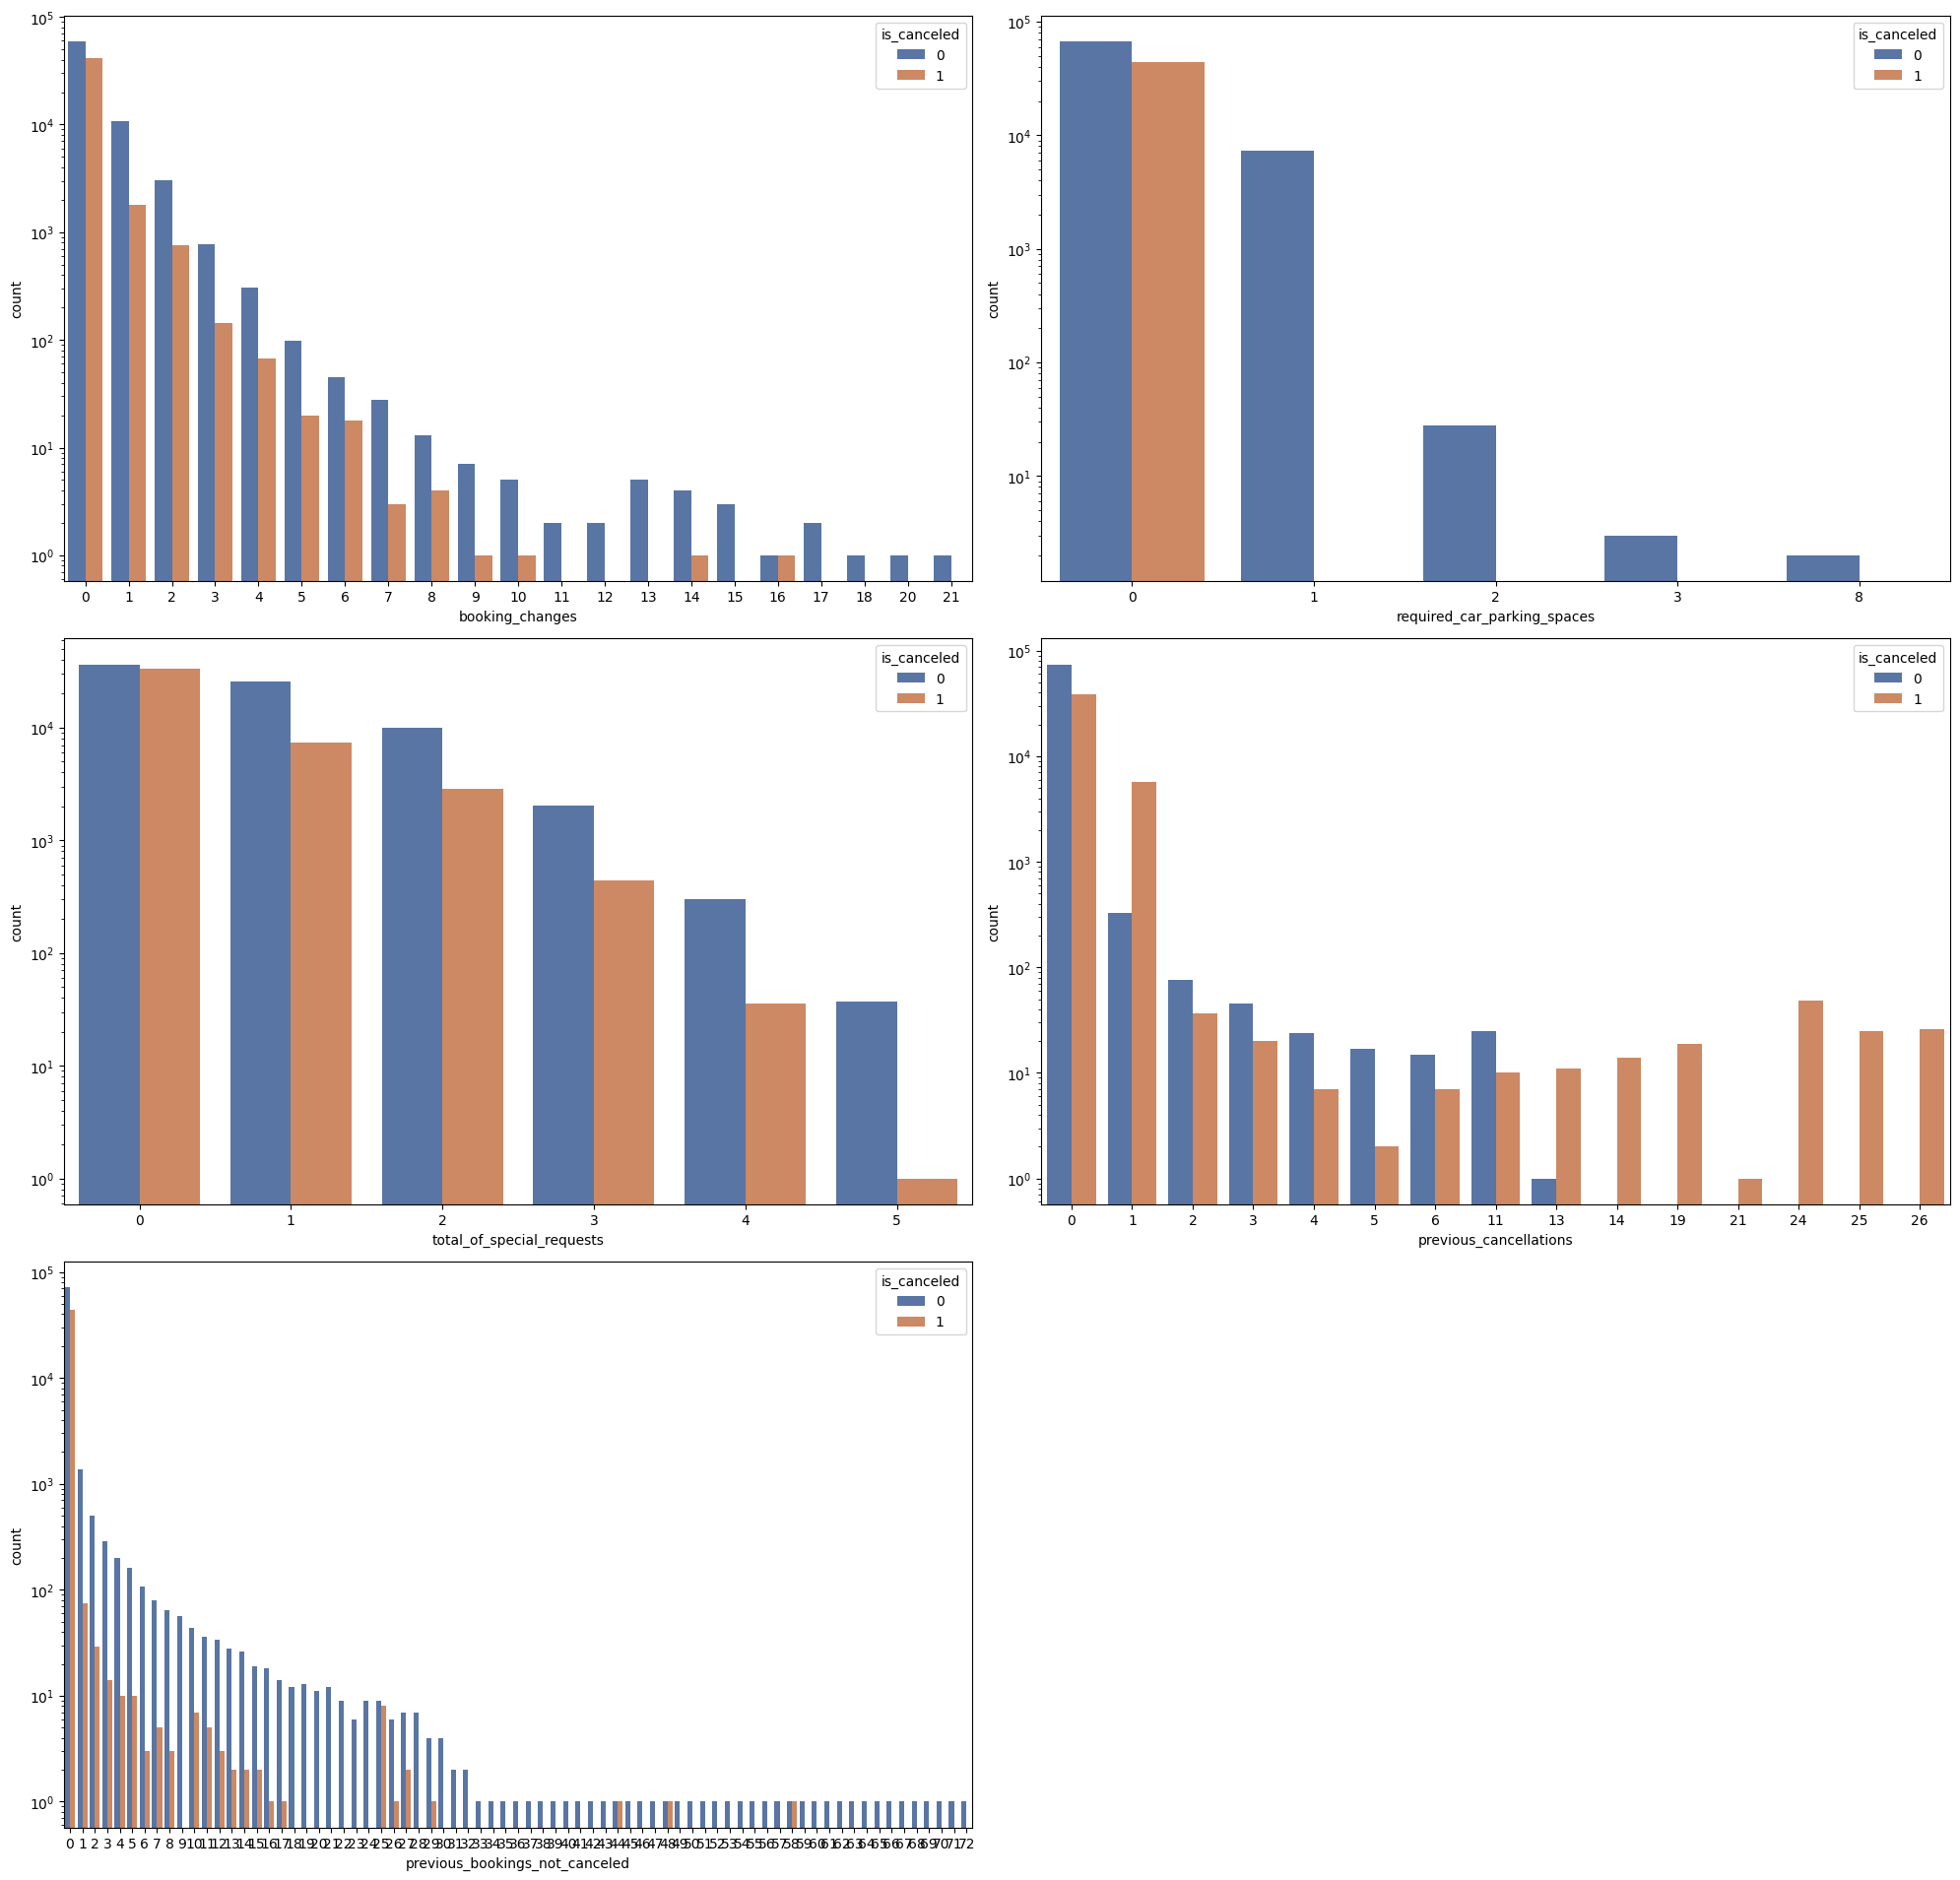

In [ ]:
# Numerical EDA
numeric_var = df[['booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'previous_cancellations', 'previous_bookings_not_canceled']]

# Create a 3x2 subplot grid with an empty placeholder
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Iterate over selected variables for count plots
for ix, num in enumerate(numeric_var):
    g = sns.countplot(x=num, hue='is_canceled', data=df, palette='deep', log=True, ax=ax.flatten()[ix])

# Remove the subplot in the last row and last column (bottom-right corner)
fig.delaxes(ax[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

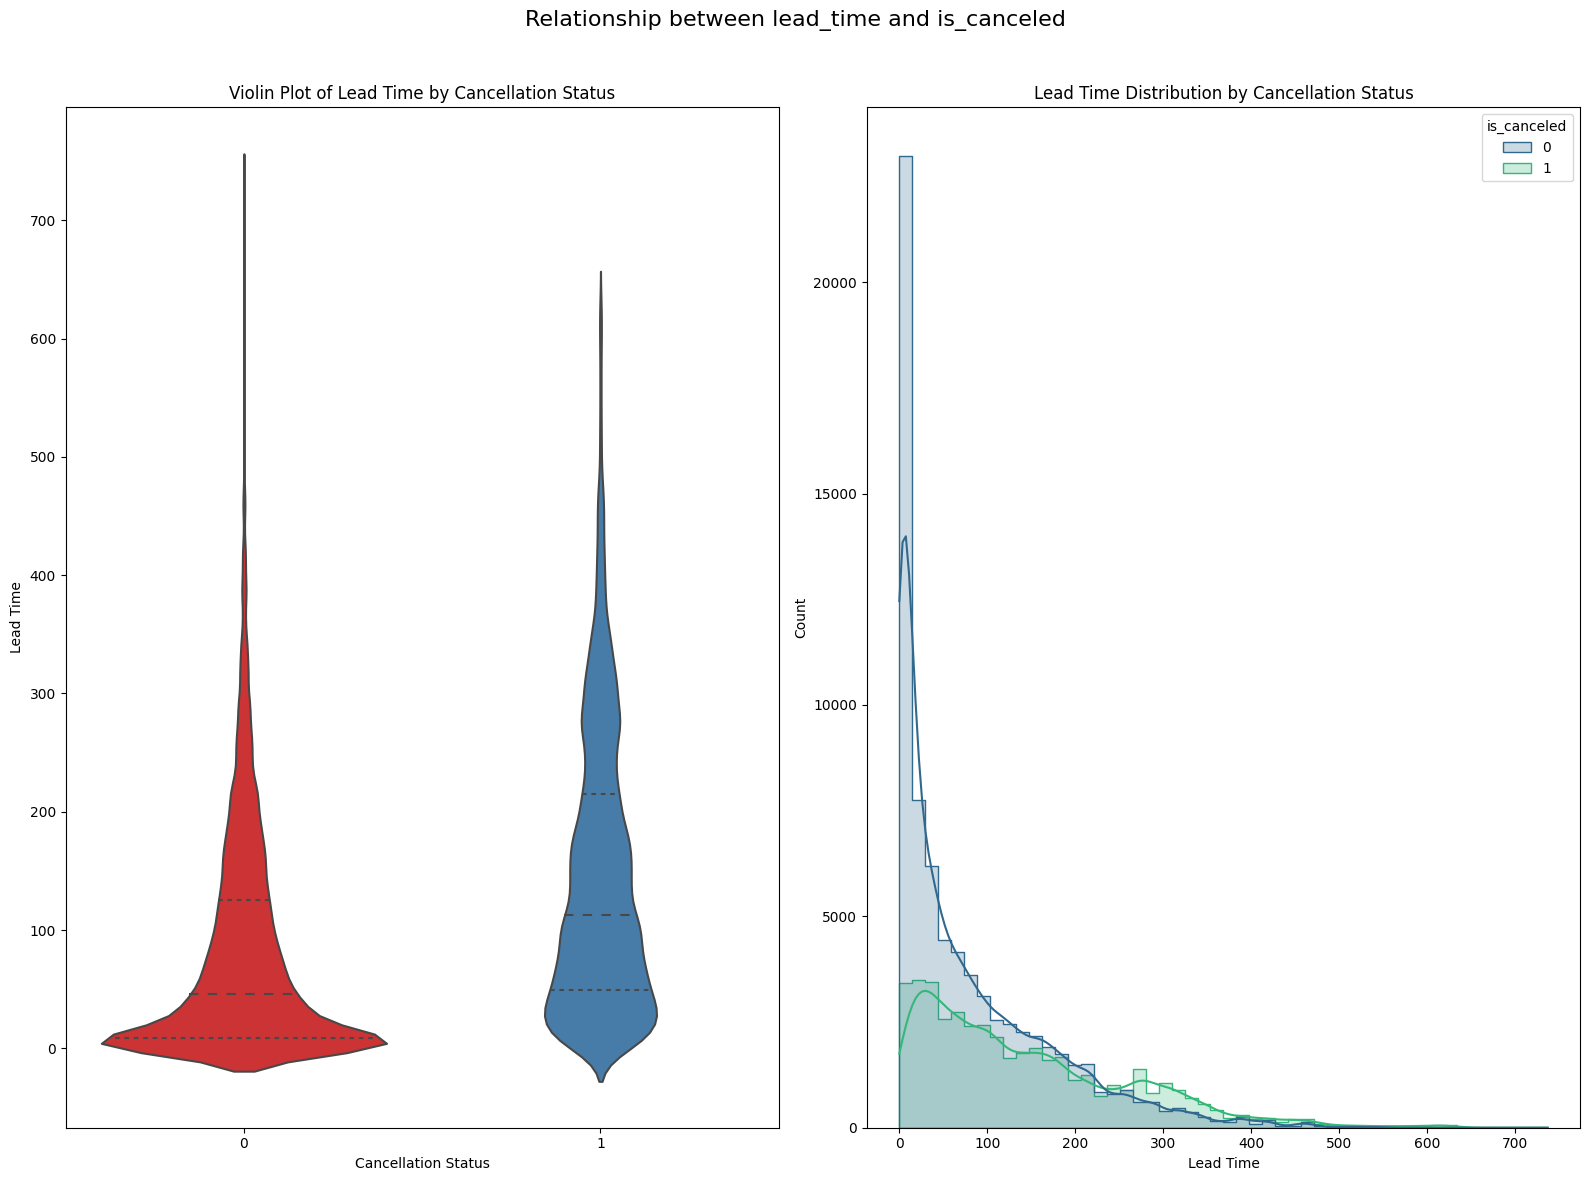

In [ ]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
fig.suptitle('Relationship between lead_time and is_canceled', fontsize=16)

# Violin Plot
sns.violinplot(ax=axes[0], x='is_canceled', y='lead_time', data=df_clean, palette='Set1', inner='quartile')
axes[0].set_title('Violin Plot of Lead Time by Cancellation Status')
axes[0].set_xlabel('Cancellation Status')
axes[0].set_ylabel('Lead Time')

# Histogram
sns.histplot(ax=axes[1], data=df_clean, x='lead_time', hue='is_canceled', bins=50, kde=True, palette='viridis', element='step')
axes[1].set_title('Lead Time Distribution by Cancellation Status')
axes[1].set_xlabel('Lead Time')
axes[1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# top 10 countries cancelled bookings
cancel_num = df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
cancel_num.columns = ['country', 'cancelled guests']
cancel_num.head(10)

,country,cancelled guests
0,PRT,27515
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


In [ ]:
# To see which country contributes the highest no of guest
origin_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_guests.columns = ['country', 'No of guests']
origin_guests.head(10)

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


In [ ]:
# using Plotly.express to plot a choropleth map
import plotly.express as px

px.choropleth(origin_guests,
                    locations = "country",
                    color= "No of guests",
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

# Phase 4: Modeling

For the modeling part, we used the decision tree and random forest to predict the number of hotels being booking and hotels being cancalled based on booking lead time, booking policies and customer behaviour.

##Data Preprocessing

In [ ]:
# Create dummy variables for the hotel,meal,country,reserved_room_type,deposit type
df_clean_hotel = pd.get_dummies(df_clean['hotel'])
df_clean_meal = pd.get_dummies(df_clean['meal'])
df_clean_country = pd.get_dummies(df_clean['country'])
df_clean_reserved_room_type = pd.get_dummies(df_clean['reserved_room_type'])
df_clean_deposit_type	= pd.get_dummies(df_clean['deposit_type'])

df_clean_new = pd.concat([df_clean,df_clean_hotel,df_clean_meal,df_clean_country,df_clean_reserved_room_type,df_clean_deposit_type],axis=1)
print(df_clean_new)

               hotel  is_canceled  lead_time meal country  is_repeated_guest  \
0       Resort Hotel            0        342   BB     PRT                  0   
1       Resort Hotel            0        737   BB     PRT                  0   
2       Resort Hotel            0          7   BB     GBR                  0   
3       Resort Hotel            0         13   BB     GBR                  0   
4       Resort Hotel            0         14   BB     GBR                  0   
...              ...          ...        ...  ...     ...                ...   
119385    City Hotel            0         23   BB     BEL                  0   
119386    City Hotel            0        102   BB     FRA                  0   
119387    City Hotel            0         34   BB     DEU                  0   
119388    City Hotel            0        109   BB     GBR                  0   
119389    City Hotel            0        205   HB     DEU                  0   

        previous_cancellations  previou

In [ ]:
#Split dataset into independent & dependents
independent_v = ['City Hotel','Resort Hotel','lead_time','BB','FB','HB','SC','PRT','GBR','ESP','FRA','ITA','DEU','IRL','BRA','USA','BEL','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',"A","B","C","D","E","F","G","H","L","P",'booking_changes',"No Deposit", "Non Refund", "Refundable",'required_car_parking_spaces','total_of_special_requests']
x = df_clean_new[independent_v]
y = df_clean_new["is_canceled"]

In [ ]:
df_clean_new[independent_v].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   City Hotel                      118898 non-null  uint8
 1   Resort Hotel                    118898 non-null  uint8
 2   lead_time                       118898 non-null  int64
 3   BB                              118898 non-null  uint8
 4   FB                              118898 non-null  uint8
 5   HB                              118898 non-null  uint8
 6   SC                              118898 non-null  uint8
 7   PRT                             118898 non-null  uint8
 8   GBR                             118898 non-null  uint8
 9   ESP                             118898 non-null  uint8
 10  FRA                             118898 non-null  uint8
 11  ITA                             118898 non-null  uint8
 12  DEU                             118898 non-n

In [ ]:
#Split dataset into training and test set
#80:20

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

##4.1 Decision Tree

In [ ]:
# Create Dicision Tree Model
dt_m = DecisionTreeClassifier()

# Fit the model using the training data
dt_m = dt_m.fit(x_train, y_train)

# Predict using the trained model
y_pred_dt = dt_m.predict(x_test)

In [ ]:
#Build the confusion matrix

cm = confusion_matrix(y_test,y_pred_dt)

cm_table = pd.DataFrame(cm, index=['Actual Not Canceled','Actual Canceled'], columns=['Predicted Not Canceled','Predicted Canceled'])

print(cm_table)

                     Predicted Not Canceled  Predicted Canceled
Actual Not Canceled                   13202                1841
Actual Canceled                        2738                5999


In [ ]:
#Evaluation the model by using those metrics

accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
precision_dt = metrics.precision_score(y_test, y_pred_dt)
recall_dt = metrics.recall_score(y_test, y_pred_dt)
fl_dt = metrics.f1_score(y_test, y_pred_dt)

print("Accuracy Score:", round(accuracy_dt,3))
print("Precision Score:", round(precision_dt,3))
print("Recall Score:", round(recall_dt,3))
print("F1 Score:", round(fl_dt,3))

Accuracy Score: 0.807
Precision Score: 0.765
Recall Score: 0.687
F1 Score: 0.724


# 4.2 Random Forest

In [ ]:
# Create a RandomForestClassifier object with 100 trees.
rf_m = RandomForestClassifier(n_estimators=100)

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model using the training data
rf_model.fit(x_train, y_train)

# Predict using the trained model
y_pred_rf = rf_model.predict(x_test)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix in a table format
cm_table_rf = pd.DataFrame(cm_rf, index=['Actual Not Canceled', 'Actual Canceled'],
                           columns=['Predicted Not Canceled', 'Predicted Canceled'])

print(cm_table_rf)

                     Predicted Not Canceled  Predicted Canceled
Actual Not Canceled                   13205                1838
Actual Canceled                        2583                6154


In [ ]:
#Evaluation the model by using those metrics

accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
precision_rf = metrics.precision_score(y_test, y_pred_rf)
recall_rf = metrics.recall_score(y_test, y_pred_rf)
fl_rf = metrics.f1_score(y_test, y_pred_rf)

print("Accuracy Score:", round(accuracy_rf,3))
print("Precision Score:", round(precision_rf,3))
print("Recall Score:", round(recall_rf,3))
print("F1 Score:", round(fl_rf,3))

Accuracy Score: 0.814
Precision Score: 0.77
Recall Score: 0.704
F1 Score: 0.736


#4.3 Logistic Regression Model

In [ ]:
# Create Logistic Regression Model
lr_model = LogisticRegression(max_iter=650)

# Fit the model using the training data
lr_model.fit(x_train, y_train)

# Predict using the trained model
y_pred_lr = lr_model.predict(x_test)

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix in a table format
cm_table_lr = pd.DataFrame(cm_lr, index=['Actual Not Canceled', 'Actual Canceled'],
                           columns=['Predicted Not Canceled', 'Predicted Canceled'])

print(cm_table_lr)

                     Predicted Not Canceled  Predicted Canceled
Actual Not Canceled                   14071                 972
Actual Canceled                        4197                4540


In [ ]:
#Evaluation the model by using those metrics

accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
fl_lr = metrics.f1_score(y_test, y_pred_lr)

print("Accuracy Score:", round(accuracy_lr,3))
print("Precision Score:", round(precision_lr,3))
print("Recall Score:", round(recall_lr,3))
print("F1 Score:", round(fl_lr,3))

Accuracy Score: 0.783
Precision Score: 0.824
Recall Score: 0.52
F1 Score: 0.637


# Phase 5: Evaluation

#5.1 EDA Finding

From the Exploratory Data Analysis (EDA) it is found that the cancellation pattern is in the higher density due to the price ranges where it likely the pricing is inpredictable. In such case, the booking cancellation might influenced due to the trends in rates. Therefore, certain rate changes might lead to the booking cancellations.
Basically, the booking policies, pricing trends can be adjusted so that cancellations percentage could be reduced as well as it could also reduce the uncertain hotel bookings.

There are few insights that can observed from violin plot:

Compared to bookings that is canceled, the area for bookings that are not canceled when lead time = 0 are broader. This suggests a pattern of successful immediate bookings with a potentially lower risk of cancellations.

The similar overall shape suggests that, regardless of the cancellation status, there is a common booking pattern. Both groups of guests, whether they cancel or not, exhibit a tendency for certain lead time preferences. However, the difference in area for both indicates that the total amount of booking made is higher than the total amount of booking that is canceled.

The cone shape, with a broader area at the bottom and tapering towards the top, indicates that there is a concentration of bookings with shorter lead times, and as lead times increase, the number of bookings decreases. This is a typical pattern seen in time-to-event analyses.

A common trend of guests making reservations with shorter lead times can be confirmed by looking at the histogram. Both histograms for booking made and bookings that are not canceled are right skewed. The right-skewed distribution suggests that a substantial number of guests are inclined towards spontaneous or last-minute travel plans. This could be influenced by various factors such as flexible schedules, impromptu decisions, or the availability of last-minute deals. The observation of common booking preferences can be valuable for operational planning and marketing strategies to better cater to the booking behaviours of customers with immediate travel plans or looking for last-minute deals.

# 5.2 Data Modelling

In this phase we will evaluate on the performance of three machine learning models which are Decision Tree, Random Forest and Logistic Regression. By identify the model performance, the accuracy and F1 Score will be used as measurement which have been presented in the "evaluation_table". The evaluation_table provide and overview of the model and its prediction capabilities


In [ ]:
# Create a DataFrame to compare the accuracy scores
evalution_table = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest','Logistic Regression'],
    'Accuracy Score': [accuracy_dt, accuracy_rf, accuracy_lr],
    'F1 Score': [f1_dt,f1_rf,fl_lr]
})

print(evalution_table)

                 Model  Accuracy Score  F1 Score
0        Decision Tree        0.807443  0.724082
1        Random Forest        0.814087  0.734750
2  Logistic Regression        0.782632  0.637238


From the evaluation result, it is showing that Random Forest is better than Decision Tree and Logistic Regression for prediction of hotel booking and cancellation as Random Forest achieve the accuracy score of 0.814 and F1 score 0.735. Basically, Random Forest also be more accurate due to combine of multiple trees and provide the better predictive performance and also robustness.



# 5.3 Future Direction

Researchers can include more variables for the hotels prediction model such as variable to define “public holiday or not public holiday” and list out the special requests. There is importance to study the relationship between public holiday and special requests with hotel booking and cancellation for identify the trends and consumer behaviors. Next, Consider exploring other machine learning models or ensemble methods that might better capture the complexity of the data. When dealing with imbalanced datasets in research, where one class significantly outnumbers the others, researchers can employ Resampling Techniques to address this issue and improve the model's performance.

# Phase 6: Deployment

In the deployment phase of the CRISP-DM methodology for Predicting Models on Hotel Bookings and Cancellations, the focus is on implementing the selected Random Forest model into the operational environment. The first step involves exporting the trained Random Forest model, capturing all relevant parameters and configurations required for deployment. This model is then seamlessly integrated into the hotel booking and cancellation system or relevant business processes. Special attention is given to scalability considerations, ensuring the model can efficiently handle real-time or batch predictions based on operational demands.

Monitoring and logging mechanisms are put in place to track the model's performance and behavior in the production environment. Additionally, user training is conducted to familiarize stakeholders with interpreting and leveraging the model's predictions effectively. Thorough documentation is updated to outline the deployment process, providing clear instructions for maintaining and updating the model.

The validation phase is crucial, involving extensive testing to confirm the accuracy, reliability, and consistency of the deployed Random Forest model in the real-world setting. Successful deployment is communicated to relevant stakeholders, including business owners, IT teams, and end-users. Ongoing maintenance plans are implemented, encompassing periodic updates, retraining with new data, and addressing any issues that may arise in the production environment.

Continuous performance monitoring is established to ensure that the deployed model aligns with business objectives and adapts to evolving data patterns. The deployment phase serves as the bridge between model development and practical application, translating predictive insights into actionable results within the hotel booking and cancellation domain.